# Tratamento dos dados

### Imports

In [546]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.signal import savgol_filter
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

### Filtragem dos dados


In [547]:
file_path = r'.\dataset _original _rodada _1 _(vinho _branco) _FieldSpec.xlsx'
#file_path = r'C:\Users\lenau\Documents\GitHub\field_spec_data_tests\dataset_original_rodada_1_(vinho_branco)_FieldSpec.xlsx'

#importando o arquivo e guardando na variável file_path

fs_df = pd.read_excel(file_path)
#o pandas como pd lê o arquivo em file_path e guarda na variavel fs_df

#fs_df mostra o arquivo completo

fs_df.tail()

,Wavelength,Date,Tank,TA,AV,AT,pH,MV,AR,350,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
37,amostra_00038.asd.txt,2022-11-09,110,11.5,0.27,5.10,3.8,995,1.8,1.503835,...,2.656636,2.550109,2.501081,2.471406,2.529202,2.619732,2.639313,2.598884,2.575628,2.642086
38,amostra_00039.asd.txt,2022-11-09,110,11.5,0.27,5.10,3.8,995,1.8,1.664785,...,2.797181,2.758138,3.052151,3.213511,3.071573,3.178512,3.150150,3.103570,3.097533,3.154010
39,amostra_00040.asd.txt,2022-11-09,110,11.5,0.29,5.17,3.8,995,1.8,1.863774,...,3.127336,2.887030,2.822618,2.870859,2.779617,2.837596,2.990740,2.869202,2.732040,2.635091
40,amostra_00041.asd.txt,2022-11-09,110,11.5,0.29,5.17,3.8,995,1.8,1.670042,...,2.718212,2.633415,2.549066,2.544755,2.590426,2.767958,3.169085,3.571220,3.605718,4.104746
41,amostra_00042.asd.txt,2022-11-09,110,11.5,0.27,5.10,3.8,995,1.8,1.695179,...,2.745712,2.794190,2.618852,2.728730,2.796776,2.743646,3.205304,3.058834,2.688029,2.637008


In [548]:
# Supondo que fs_df já esteja definido
# params contém as colunas específicas que queremos
params = ['TA', 'AV', 'AT', 'pH', 'MV', 'AR']
# Seleciona as colunas especificadas em params e remove linhas com valores NaN
fs_params = fs_df[params].dropna()
# Seleciona as colunas de interesse (da coluna 39 até a coluna 2130)
#fs_vars = fs_df.iloc[:, 39:2130].columns.to_list()
fs_vars = fs_df.iloc[:, 9:2160].columns.to_list()
# Concatena as colunas de params e fs_vars
fs = fs_vars
# Seleciona as colunas especificadas em fs do dataframe fs_df e remove linhas com valores NaN
dados_wl = fs_df[fs].dropna()
# Exibe o dataframe resultante
#print(fs_df_selected)
# Cria um array de comprimentos de onda
wl = np.arange(350, 2501, 1)
# Exibe os comprimentos de onda
print(wl)
#dados_wl
#fs
dados_wl = fs_df[fs_vars]

[ 350  351  352 ... 2498 2499 2500]


# Pré-processamento dos dados


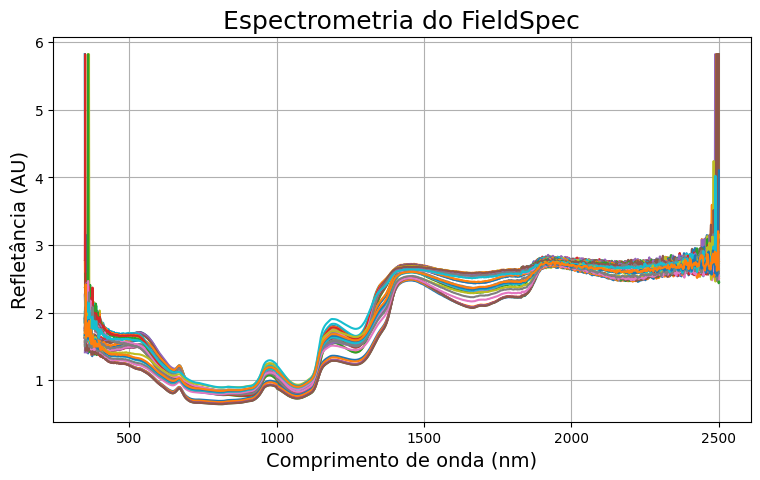

In [549]:

# Define o tamanho da figura como 12x9 polegadas
plt.figure(figsize=(9,5))
# Plota os dados contidos no DataFrame df em relação aos valores do eixo x x_axis_fs
plt.plot(wl, dados_wl.T)
# Define o rótulo do eixo x como "Comprimento de onda (nm)" com tamanho de fonte 14
plt.xlabel("Comprimento de onda (nm)", size=14)
# Define o rótulo do eixo y como "Refletância (AU)" com tamanho de fonte 14
plt.ylabel("Refletância (AU)", size=14)
# Define o título do gráfico como "Espectrometria do FieldSpec" com tamanho de fonte 18
plt.title("Espectrometria do FieldSpec", size=18)
# Ativa a grade no gráfico
plt.grid("on")
# Exibe o gráfico
plt.show()


### Savitzky-Golay

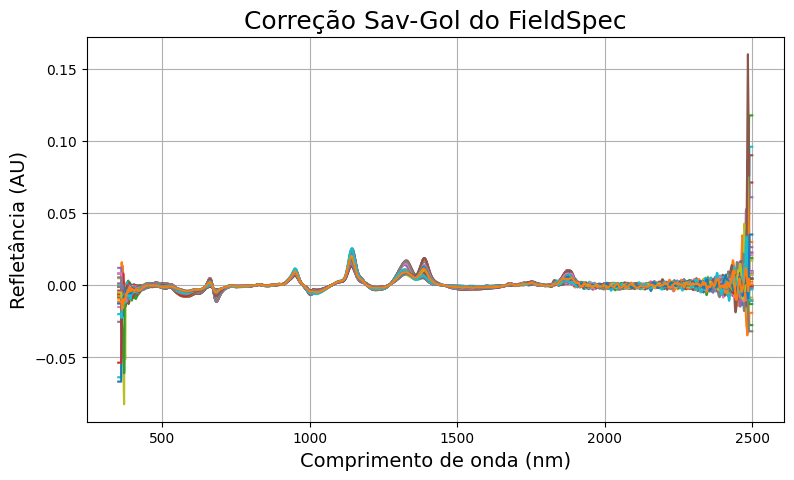

In [550]:
# Aplica a função savgol_filter aos dados x
# para calcular a primeira derivada dos dados
# utilizando uma janela de tamanho 20 e um polinômio de ordem 1
sav_gol = savgol_filter(dados_wl, 21, polyorder=1, deriv=1) 
# Define o tamanho da figura como 12x9 polegadas
plt.figure(figsize=(9,5))
# Plota os dados contidos no DataFrame df em relação aos valores do eixo x x_axis_fs
plt.plot(wl, sav_gol.T)
# Define o rótulo do eixo x como "Comprimento de onda (nm)" com tamanho de fonte 14
plt.xlabel("Comprimento de onda (nm)", size=14)
# Define o rótulo do eixo y como "Refletância (AU)" com tamanho de fonte 14
plt.ylabel("Refletância (AU)", size=14)
# Define o título do gráfico como "Espectrometria do FieldSpec" com tamanho de fonte 18
plt.title("Correção Sav-Gol do FieldSpec", size=18)
# Ativa a grade no gráfico
plt.grid("on")
# Exibe o gráfico
plt.show()


In [551]:
# Criando um DataFrame a partir dos dados
df_savgol = pd.DataFrame(sav_gol)
# Nome do arquivo Excel a ser exportado
filename = 'dataset_savgol_ordem_1.xlsx'
# Exportando o DataFrame para um arquivo Excel, excluindo o índice das linhas
df_savgol.to_excel(filename, index=False)
# Imprimindo uma mensagem indicando que o conjunto de dados foi exportado com sucesso para o Excel
print("Dataset exported successfully to Excel.")

Dataset exported successfully to Excel.


### MSC

In [552]:
def apply_msc(df):
    """
    Aplica a correção multiplicativa de espalhamento (MSC) aos dados espectroscópicos.
    Parâmetros:
    df : pandas.DataFrame
        DataFrame contendo os dados espectroscópicos. As linhas devem ser amostras e as colunas devem ser comprimentos de onda.
    
    Retorna:
    pandas.DataFrame
        DataFrame com os dados corrigidos pelo MSC.
    """
    # Calcula o espectro médio de referência
    mean_spectrum = df.mean(axis=0)
    
    # Lista para armazenar os espectros corrigidos
    corrected_spectra = []
    
    # Aplica MSC a cada espectro individualmente
    for i in range(df.shape[0]):
        spectrum = df.iloc[i, :]
        
        # Ajusta uma linha reta ao espectro médio de referência
        slope, intercept = np.polyfit(mean_spectrum, spectrum, 1)
        
        # Corrige o espectro
        corrected_spectrum = (spectrum - intercept) / slope
        corrected_spectra.append(corrected_spectrum)
    
    # Converte a lista de espectros corrigidos de volta para um DataFrame
    corrected_df = pd.DataFrame(corrected_spectra, columns=df.columns)
    
    return corrected_df

dados_wl
df_msc = apply_msc(dados_wl)
#df_msc

ValueError: x and y must have same first dimension, but have shapes (2091,) and (2151, 42)

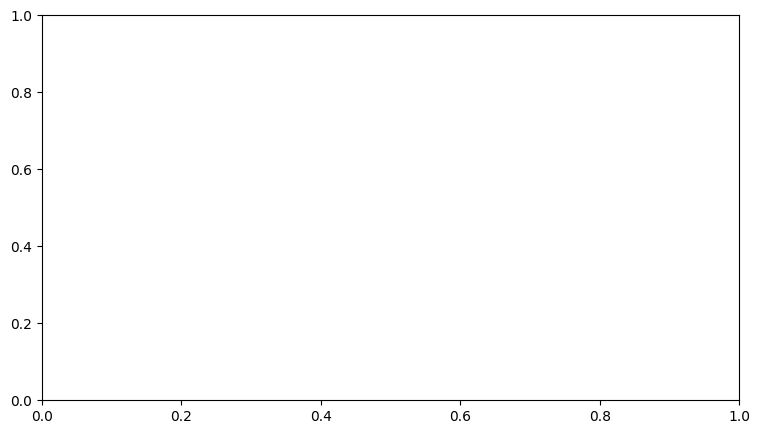

In [553]:
# Define o tamanho da figura como 12x9 polegadas
plt.figure(figsize=(9, 5))
# Plota os dados corrigidos
plt.plot(np.arange(380, 2471), df_msc.T)
# Define o rótulo do eixo x como "Comprimento de onda (nm)" com tamanho de fonte 14
plt.xlabel("Comprimento de onda (nm)", size=14)
# Define o rótulo do eixo y como "Refletância (AU)" com tamanho de fonte 14
plt.ylabel("Refletância (AU)", size=14)
# Define o título do gráfico como "Espectrometria do FieldSpec" com tamanho de fonte 18
plt.title("MSC do FieldSpec", size=18)
# Ativa a grade no gráfico
plt.grid("on")
# Exibe o gráfico
plt.show()

In [ ]:
# Criando um DataFrame a partir dos dados
df = pd.DataFrame(df_msc)
# Nome do arquivo Excel a ser exportado
filename = 'dataset_msc.xlsx'
# Exportando o DataFrame para um arquivo Excel, excluindo o índice das linhas
df.to_excel(filename, index=False)
# Imprimindo uma mensagem indicando que o conjunto de dados foi exportado com sucesso para o Excel
print("Dataset exported successfully to Excel.")

Dataset exported successfully to Excel.


### SNV

In [ ]:
#dados_wl

In [ ]:
def snv(input_data):
    """
    Aplica a transformação Standard Normal Variate (SNV) aos dados de entrada.
    
    Parameters:
    input_data (numpy.ndarray): Dados de entrada, onde cada linha é um espectro.
    
    Returns:
    numpy.ndarray: Dados transformados após a aplicação do SNV.
    """
    # Calcular a média de cada linha
    mean = np.mean(input_data, axis=1, keepdims=True)
    # Calcular o desvio padrão de cada linha
    std_dev = np.std(input_data, axis=1, keepdims=True)
    # Aplicar a transformação SNV
    snv_data = (input_data - mean) / std_dev
    return snv_data

# Exemplo de DataFrame (substitua pelo seu DataFrame real)
dados_wl

# Certifique-se de que os dados são numéricos
if not np.issubdtype(dados_wl.values.dtype, np.number):
    raise ValueError("Todos os dados de entrada devem ser numéricos.")

# Aplicando a transformação SNV ao DataFrame
df_snv = snv(dados_wl.values)
df_snv = pd.DataFrame(df_snv, columns=wl)

#data_snv_fs


In [ ]:
# Defina o nome do arquivo onde deseja salvar os dados corrigidos
filename = "dataset_snv.xlsx"

# Salve os dados corrigidos em um novo arquivo Excel
df_snv.to_excel(filename, index=False)

# Exiba uma mensagem indicando que o arquivo foi salvo com sucesso
print(f"Dados corrigidos salvos com sucesso em {filename}")

Dados corrigidos salvos com sucesso em dataset_snv.xlsx


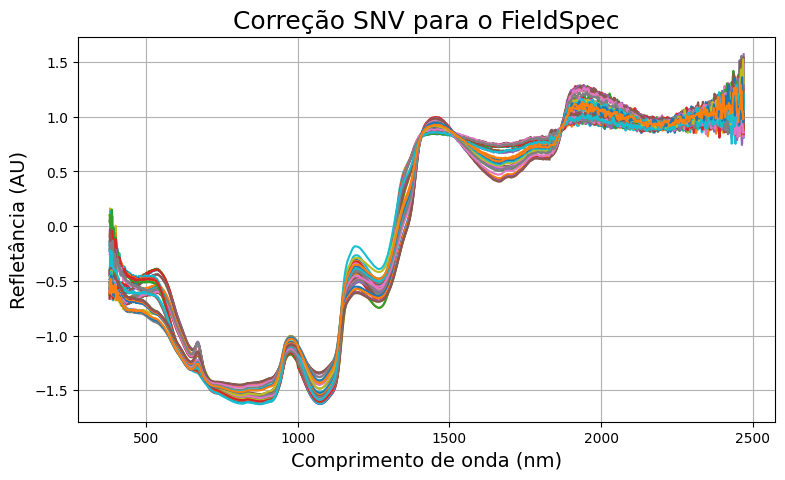

In [ ]:
# Cria uma figura para o gráfico com tamanho 12x9 polegadas
plt.figure(figsize=(9, 5))
# Plota os dados corrigidos SNV em relação ao eixo x wl
plt.plot(wl, df_snv.T)
# Define o rótulo do eixo x como "Comprimento de onda (nm)" e o tamanho da fonte como 14
plt.xlabel("Comprimento de onda (nm)", size=14)
# Define o rótulo do eixo y como "Refletância (AU)" e o tamanho da fonte como 14
plt.ylabel("Refletância (AU)", size=14)
# Define o título do gráfico como "Correção SNV para o FieldSpec" e o tamanho da fonte como 18
plt.title("Correção SNV para o FieldSpec", size=18)
# Adiciona uma grade ao gráfico
plt.grid("on")
# Exibe o gráfico
plt.show()

# Divisão de dados

In [ ]:
# Lista de conjuntos de dados espectrais (X) e atributos de qualidade (Y) para cada dispositivo
Y = fs_df[['TA', 'AV', 'AT', 'pH', 'MV', 'AR']]
X = dados_wl
Y_ar = fs_df['AR'].values


# Aplicação do modelo PSL

### PSL (k-fold e cv)

In [570]:
def optimise_pls_cv(X, Y, n_comp):
    '''
    Executa o PLS incluindo um número variável de componentes, até n_comp,
    e calcula MSE, RMSE, R^2 e RPD para calibração e validação.
    '''
    # Inicializa listas para armazenar os resultados
    mse = []
    r2_calib = []
    r2_cv = []
    rmse_calib = []
    rmse_cv = []
    rpd_calib = []
    rpd_cv = []
    bias = []
    results = []

    # Itera sobre cada coluna em Y
    for col in Y.columns:
        y = Y[col]  # Seleciona a coluna atual de Y

        mse_col = []  # Lista para armazenar os MSEs para a coluna atual
        component = np.arange(1, n_comp)  # Número de componentes a serem testados

        # Itera sobre cada número de componentes
        for i in component:
            pls = PLSRegression(n_components=i)  # Cria o modelo PLS com i componentes

            # Realiza a predição com validação cruzada
            y_cv = cross_val_predict(pls, X, y, cv=10)

            # Calcula o MSE para a validação cruzada
            mse_val = mean_squared_error(y, y_cv)
            mse_col.append(mse_val)

        # Encontra o número de componentes que minimiza o MSE
        msemin = np.argmin(mse_col)

        # Define o modelo PLS com o número ótimo de componentes
        pls_opt = PLSRegression(n_components=msemin + 1)

        # Ajusta o modelo ao conjunto de dados completo
        pls_opt.fit(X, y)
        y_c = pls_opt.predict(X)

        # Realiza a predição com validação cruzada usando o modelo otimizado
        y_cv = cross_val_predict(pls_opt, X, y, cv=10)

        # Calcula o R^2 para calibração e validação
        r2_calib_val = r2_score(y, y_c)
        r2_cv_val = r2_score(y, y_cv)

        # Calcula o MSE para calibração e validação
        mse_calib_val = mean_squared_error(y, y_c)
        mse_cv_val = mean_squared_error(y, y_cv)

        # Calcula o RMSE para calibração e validação
        rmse_calib_val = np.sqrt(mse_calib_val)
        rmse_cv_val = np.sqrt(mse_cv_val)

        # Calcula o RPD para calibração e validação
        rpd_calib_val = np.std(y) / rmse_calib_val
        rpd_cv_val = np.std(y) / rmse_cv_val
        
        # Calcula o bias para calibração e validação
        bias_calc = np.mean(y_c - y_cv)

        # Armazena os resultados em um dicionário e adiciona à lista de resultados
        results.append({
            'Column': col,
            'R2_calib': r2_calib_val,
            'R2_cv': r2_cv_val,
            'MSE_calib': mse_calib_val,
            'MSE_cv': mse_cv_val,
            'RMSE_calib': rmse_calib_val,
            'RMSE_cv': rmse_cv_val,
            'RPD_calib': rpd_calib_val,
            'RPD_cv': rpd_cv_val,
            'Bias': bias_calc
        })


    print("\n")

# Cria um DataFrame com os resultados
    results_df = pd.DataFrame(results, columns=['Column', 'R2_calib', 'R2_cv', 'MSE_calib', 'MSE_cv', 'RMSE_calib', 'RMSE_cv', 'RPD_calib', 'RPD_cv', 'Bias'])

    return results_df


In [ ]:
def optimise_pls_cv(X, Y, n_comp, test_size=0.3, random_state=None):
    '''
    Executa o PLS incluindo um número variável de componentes, até n_comp,
    e calcula MSE, RMSE, R^2, RPD e bias usando divisão 70-30.
    '''
    # Lista para armazenar os resultados
    results = []

    # Divisão dos dados em conjuntos de treino (70%) e teste (30%)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=random_state)

    # Itera sobre cada coluna em Y
    for col in Y.columns:
        mse_fold = []  # Lista para armazenar os MSEs para cada número de componentes

        # Itera sobre cada número de componentes de 1 até n_comp-1
        for i in range(1, n_comp):
            pls = PLSRegression(n_components=i)  # Cria o modelo PLS com i componentes

            # Ajusta o modelo PLS ao conjunto de treino
            pls.fit(X_train, Y_train[col])

            # Prediz o conjunto de teste
            Y_pred = pls.predict(X_test)

            # Calcula o MSE para o conjunto de teste
            mse_fold.append(mean_squared_error(Y_test[col], Y_pred))

        mse_cv = np.array(mse_fold)  # Converte a lista de MSEs para um array numpy
        msemin = np.argmin(mse_cv)  # Encontra o índice do menor MSE

        # Define o modelo PLS com o número ótimo de componentes (aquele que minimiza o MSE)
        pls_opt = PLSRegression(n_components=msemin)

        # Ajusta o modelo ao conjunto de dados completo
        pls_opt.fit(X, Y[col])
        Y_c = pls_opt.predict(X)

        # Calcula o R^2 para calibração (ajuste ao conjunto completo)
        score_c = r2_score(Y[col], Y_c)

        # Calcula o MSE para calibração
        mse_c = mean_squared_error(Y[col], Y_c)

        # Calcula o RMSE para calibração
        rmse_c = np.sqrt(mse_c)

        # Calcula o R^2 para validação (conjunto de teste)
        score_cv = r2_score(Y_test[col], Y_pred)

        # Calcula o MSE para validação
        mse_cv = mean_squared_error(Y_test[col], Y_pred)

        # Calcula o RMSE para validação
        rmse_cv = np.sqrt(mse_cv)

        # Calcula o RPD para calibração e validação
        rpd_calib = np.std(Y[col]) / rmse_c
        rpd_cv = np.std(Y_test[col]) / rmse_cv

        # Calcula o bias
        bias = np.mean(Y_pred - Y_test[col])

        # Armazena os resultados em um dicionário e adiciona à lista de resultados
        results.append({
            'Column': col,
            'R2_calib': score_c,
            'R2_cv': score_cv,
            'MSE_calib': mse_c,
            'MSE_cv': mse_cv,
            'RMSE_calib': rmse_c,
            'RMSE_cv': rmse_cv,
            'RPD_calib': rpd_calib,
            'RPD_cv': rpd_cv,
            'Bias': bias
        })

    # Converte a lista de resultados para um DataFrame pandas e o retorna
    return pd.DataFrame(results)

# Supondo que você tenha X e Y definidos
# Aplica a função optimise_pls_cv a diferentes conjuntos de dados
results_pls_raw = optimise_pls_cv(dados_wl, Y, n_comp=6, random_state=42)
results_pls_msc = optimise_pls_cv(df_msc, Y, n_comp=6, random_state=42)
results_pls_snv = optimise_pls_cv(df_snv, Y, n_comp=6, random_state=42)
results_pls_sg = optimise_pls_cv(sav_gol, Y, n_comp=6, random_state=42)


### PSL - RAW

In [571]:
raw_psl = optimise_pls_cv(dados_wl,Y,5)
raw_psl

,Column,R2_calib,R2_cv,MSE_calib,MSE_cv,RMSE_calib,RMSE_cv,RPD_calib,RPD_cv,Bias
0,TA,0.931583,0.741273,0.110893,0.419357,0.333006,0.647578,3.823131,1.965979,0.122829
1,AV,0.967423,0.903170,0.000308,0.000916,0.017555,0.030266,5.540406,3.213619,0.001080
2,AT,0.803859,0.724696,0.142887,0.200556,0.378003,0.447834,2.257955,1.905871,-0.024855
3,pH,0.735903,-0.003933,0.000533,0.002026,0.023086,0.045012,1.945891,0.998039,-0.004497
4,MV,0.979184,0.912195,26.677356,112.529900,5.165013,10.608011,6.931098,3.374733,-0.746931
5,AR,0.982572,0.932396,117.791805,456.910904,10.853193,21.375474,7.574808,3.846037,-1.270443


In [555]:
results_pls_raw


,Column,R2_calib,R2_cv,MSE_calib,MSE_cv,RMSE_calib,RMSE_cv,RPD_calib,RPD_cv,Bias
0,TA,0.931583,0.413252,0.110893,0.542279,0.333006,0.736396,3.823131,1.305491,-0.408934
1,AV,0.920385,0.842998,0.000753,0.001554,0.027444,0.039421,3.544075,2.523754,0.011788
2,AT,0.279381,0.636660,0.524961,0.254699,0.724542,0.504677,1.178005,1.658989,0.034666
3,pH,0.340505,0.107382,0.001331,0.003275,0.036482,0.057225,1.231386,1.058442,-0.011288
4,MV,0.979184,0.938886,26.677356,80.128509,5.165013,8.951453,6.931098,4.045110,-3.488587
5,AR,0.982572,0.943648,117.791805,395.444800,10.853193,19.885794,7.574808,4.212545,-8.535036


### PSL - MSC

In [ ]:
msc_psl = optimise_pls_cv(df_msc,Y,5)
msc_psl

,Column,R2_calib,R2_cv,MSE_calib,MSE_cv,RMSE_calib,RMSE_cv
0,TA,0.792885,0.684541,0.335701,0.508928,0.579397,0.713392
1,AV,0.954927,0.941097,0.000426,0.000623,0.020650,0.024969
2,AT,0.839438,0.803384,0.116968,0.184537,0.342005,0.429578
3,pH,0.524124,0.418608,0.000960,0.002133,0.030990,0.046184
4,MV,0.986171,0.967414,17.722711,38.328190,4.209835,6.190977
5,AR,0.983817,0.974490,109.374876,165.438379,10.458244,12.862285


In [ ]:
results_pls_msc

,Column,R2_calib,R2_cv,MSE_calib,MSE_cv,RMSE_calib,RMSE_cv
0,TA,0.887437,0.453132,0.182447,0.505420,0.427138,0.710929
1,AV,0.892419,0.902604,0.001018,0.000964,0.031902,0.031049
2,AT,0.866022,0.756770,0.097601,0.170503,0.312412,0.412920
3,pH,0.527473,0.394053,0.000954,0.002223,0.030881,0.047149
4,MV,0.986102,0.950904,17.811475,64.371544,4.220364,8.023188
5,AR,0.990235,0.954034,66.000593,322.562757,8.124075,17.960032


### PSL - SNV

In [ ]:
snv_psl = optimise_pls_cv(df_snv,Y,5)
snv_psl

,Column,R2_calib,R2_cv,MSE_calib,MSE_cv,RMSE_calib,RMSE_cv
0,TA,0.777004,0.717971,0.361442,0.469528,0.601201,0.685221
1,AV,0.938242,0.882928,0.000584,0.000937,0.024171,0.030615
2,AT,0.780304,0.452627,0.160045,0.337834,0.400057,0.581235
3,pH,0.688835,0.546103,0.000628,0.000322,0.025059,0.017953
4,MV,0.975381,0.947474,31.551277,49.830317,5.617052,7.059059
5,AR,0.987203,0.954220,86.487954,227.563766,9.299890,15.085217


In [ ]:
results_pls_snv

,Column,R2_calib,R2_cv,MSE_calib,MSE_cv,RMSE_calib,RMSE_cv
0,TA,0.880976,0.275713,0.192919,0.669393,0.439225,0.818164
1,AV,0.957006,0.933383,0.000407,0.000659,0.020168,0.025679
2,AT,0.964103,0.843753,0.026150,0.109528,0.161711,0.330951
3,pH,0.851493,0.500692,0.000300,0.001832,0.017312,0.042799
4,MV,0.990432,0.949574,12.262516,66.115225,3.501788,8.131127
5,AR,0.987203,0.961065,86.487954,273.219934,9.299890,16.529366


### PSL - SAVGOL

In [ ]:
savgol_psl = optimise_pls_cv(sav_gol,Y,5)
savgol_psl

,Column,R2_calib,R2_cv,MSE_calib,MSE_cv,RMSE_calib,RMSE_cv
0,TA,0.914575,0.717011,0.138460,0.289768,0.372102,0.538301
1,AV,0.973209,0.917589,0.000253,0.000814,0.015920,0.028533
2,AT,0.891919,0.846603,0.078735,0.104939,0.280598,0.323942
3,pH,0.824519,0.464556,0.000354,0.001141,0.018819,0.033773
4,MV,0.996403,0.960439,4.609299,52.460127,2.146928,7.242936
5,AR,0.997553,0.964281,16.541510,244.999187,4.067125,15.652450


In [ ]:
results_pls_sg

,Column,R2_calib,R2_cv,MSE_calib,MSE_cv,RMSE_calib,RMSE_cv
0,TA,0.916919,0.065709,0.134662,0.863481,0.366963,0.929237
1,AV,0.941155,0.927259,0.000557,0.000720,0.023594,0.026833
2,AT,0.786402,0.844045,0.155604,0.109323,0.394466,0.330641
3,pH,0.829298,0.359799,0.000345,0.002349,0.018561,0.048463
4,MV,0.996593,0.964605,4.366465,46.408093,2.089609,6.812349
5,AR,0.997634,0.971882,15.988674,197.316381,3.998584,14.046935


# Aplicação do modelo RF

### RF

In [ ]:
def random_forest_regression(X, Y):
    # Dividindo os dados em conjuntos de treinamento e teste
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

    # Criando listas para armazenar os resultados de calibração e validação
    resultados_calibracao = []
    resultados_validacao = []

    # Loop sobre cada atributo
    for atributo in Y.columns:
        # Treinando o modelo
        model = RandomForestRegressor()
        model.fit(X_train, Y_train[atributo])

        # Fazendo previsões nos dados de calibração
        predictions_calibracao = model.predict(X_train)

        # Calculando as métricas para os dados de calibração
        r2_calibracao = r2_score(Y_train[atributo], predictions_calibracao)
        rmse_calibracao = np.sqrt(mean_squared_error(Y_train[atributo], predictions_calibracao))
        rpd_calibracao = np.std(Y_train[atributo]) / rmse_calibracao
        bias_calibracao = np.mean(predictions_calibracao) - np.mean(Y_train[atributo])

        # Armazenando os resultados de calibração na lista
        resultados_calibracao.append({'Atributo': atributo, 'R²': r2_calibracao, 'RPD': rpd_calibracao, 'RMSE': rmse_calibracao, 'Bias': bias_calibracao})

        # Fazendo previsões nos dados de validação
        predictions_validacao = model.predict(X_test)

        # Calculando as métricas para os dados de validação
        r2_validacao = r2_score(Y_test[atributo], predictions_validacao)
        rmse_validacao = np.sqrt(mean_squared_error(Y_test[atributo], predictions_validacao))
        rpd_validacao = np.std(Y_test[atributo]) / rmse_validacao
        bias_validacao = np.mean(predictions_validacao) - np.mean(Y_test[atributo])

        # Armazenando os resultados de validação na lista
        resultados_validacao.append({'Atributo': atributo, 'R²': r2_validacao, 'RPD': rpd_validacao, 'RMSE': rmse_validacao, 'Bias': bias_validacao})

    # Convertendo as listas de dicionários em DataFrames
    resultados_calibracao_df = pd.DataFrame(resultados_calibracao)
    resultados_validacao_df = pd.DataFrame(resultados_validacao)

    return resultados_calibracao_df, resultados_validacao_df

# Testando a função com os dataframes
results_rf_raw_calibracao, results_rf_raw_validacao = random_forest_regression(dados_wl, Y)
results_rf_msc_calibracao, results_rf_msc_validacao = random_forest_regression(df_msc, Y)
results_rf_snv_calibracao, results_rf_snv_validacao = random_forest_regression(df_snv, Y)
results_rf_sg_calibracao, results_rf_sg_validacao = random_forest_regression(sav_gol, Y)

# Mesclando os resultados de calibração e validação em um único DataFrame
results_rf_raw = pd.concat([results_rf_raw_calibracao, results_rf_raw_validacao], axis=1, keys=['Calibração', 'Validação'])
results_rf_msc = pd.concat([results_rf_msc_calibracao, results_rf_msc_validacao], axis=1, keys=['Calibração', 'Validação'])
results_rf_snv = pd.concat([results_rf_snv_calibracao, results_rf_snv_validacao], axis=1, keys=['Calibração', 'Validação'])
results_rf_sg = pd.concat([results_rf_sg_calibracao, results_rf_sg_validacao], axis=1, keys=['Calibração', 'Validação'])



### Resultados

In [ ]:
print('RAW')
results_rf_raw

RAW


Calibração                                          Validação            \
    Atributo        R²        RPD      RMSE      Bias  Atributo        R²   
0         TA  0.972046   5.981082  0.231518  0.037059        TA  0.768290   
1         AV  0.984878   8.131855  0.011819 -0.000893        AV  0.765736   
2         AT  0.931232   3.813341  0.225450  0.001679        AT  0.730085   
3         pH  0.905663   3.255809  0.010591 -0.000241        pH  0.101910   
4         MV  0.994182  13.110406  2.713102  0.034138        MV  0.766997   
5         AR  0.994019  12.930941  6.295468 -0.593307        AR  0.790108   

                                  
        RPD       RMSE      Bias  
0  2.077437   0.462762 -0.114000  
1  2.066081   0.048154 -0.002208  
2  1.924804   0.434981  0.008823  
3  1.055213   0.057400 -0.015077  
4  2.071664  17.478517  3.423846  
5  2.182739  38.378293  5.313108

In [ ]:
print('MSC')
results_rf_msc

MSC


Calibração                                          Validação            \
    Atributo        R²        RPD      RMSE      Bias  Atributo        R²   
0         TA  0.976818   6.567858  0.210834 -0.022797        TA  0.659338   
1         AV  0.991065  10.578916  0.009085 -0.000821        AV  0.952452   
2         AT  0.955630   4.747381  0.181093 -0.003114        AT  0.780872   
3         pH  0.880085   2.887774  0.011941  0.001828        pH  0.165358   
4         MV  0.998312  24.338365  1.461473  0.015862        MV  0.979192   
5         AR  0.994029  12.941338  6.290410 -0.276655        AR  0.964888   

                                  
        RPD       RMSE      Bias  
0  1.713318   0.561109 -0.302346  
1  4.585983   0.021694 -0.000115  
2  2.136246   0.391927  0.059223  
3  1.094586   0.055335 -0.013846  
4  6.932403   5.223241  2.332308  
5  5.336708  15.696906  1.217462

In [ ]:
print('SNV')
results_rf_snv

SNV


Calibração                                          Validação            \
    Atributo        R²        RPD      RMSE      Bias  Atributo        R²   
0         TA  0.983068   7.685071  0.180184 -0.007952        TA  0.671429   
1         AV  0.992484  11.534413  0.008333  0.000079        AV  0.968891   
2         AT  0.948959   4.426287  0.194230  0.015810        AT  0.794069   
3         pH  0.840993   2.507794  0.013750 -0.000655        pH -0.069606   
4         MV  0.998419  25.149936  1.414312  0.109310        MV  0.976637   
5         AR  0.997204  18.912374  4.304395  0.657266        AR  0.985914   

                                 
        RPD      RMSE      Bias  
0  1.744558  0.551061 -0.300262  
1  5.669702  0.017548 -0.002685  
2  2.203633  0.379942  0.035746  
3  0.966914  0.062642 -0.009846  
4  6.542424  5.534586  2.735385  
5  8.425654  9.942232  4.095308

In [ ]:
print('SAV_GOL')
results_rf_sg

SAV_GOL


Calibração                                          Validação            \
    Atributo        R²        RPD      RMSE      Bias  Atributo        R²   
0         TA  0.965400   5.376017  0.257575  0.000597        TA  0.411164   
1         AV  0.990441  10.228074  0.009397 -0.000003        AV  0.975140   
2         AT  0.940240   4.090686  0.210164  0.014638        AT  0.846335   
3         pH  0.922686   3.596424  0.009588 -0.000759        pH  0.559908   
4         MV  0.997915  21.899777  1.624211 -0.144828        MV  0.972749   
5         AR  0.998863  29.659811  2.744668 -0.230572        AR  0.991101   

                                  
         RPD      RMSE      Bias  
0   1.303176  0.737704 -0.351269  
1   6.342317  0.015687 -0.001192  
2   2.551015  0.328204  0.090508  
3   1.507399  0.040181 -0.008385  
4   6.057764  5.977389  1.823846  
5  10.600503  7.902437  2.545246

# Aplicação do modelo PCR

### PCR (divisao)

In [597]:
def pcr_regression(X, Y):
    # Inicializa uma lista para armazenar os resultados
    resultados = []

    # Loop sobre cada atributo em Y
    for atributo in Y.columns:
        # Divide os dados em conjuntos de treinamento e teste (70-30)
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y[atributo], test_size=0.3, random_state=42)

        # Aplica a Regressão das Componentes Principais (PCR) aos dados de treinamento
        pca = PCA()
        X_train_pca = pca.fit_transform(X_train)
        X_test_pca = pca.transform(X_test)

        # Ajusta um modelo de regressão linear aos dados transformados
        model = LinearRegression()
        model.fit(X_train_pca, Y_train)

        # Realiza previsões nos dados de teste
        predictions = model.predict(X_test_pca)

        # Calcula as métricas de avaliação
        r2 = r2_score(Y_test, predictions)
        mse = mean_squared_error(Y_test, predictions)
        rmse = np.sqrt(mse)
        rpd = np.std(Y_test) / rmse

        # Calcula o bias
        bias = np.mean(predictions) - np.mean(Y_test)

        # Armazena os resultados na lista
        resultados.append({'Atributo': atributo, 'R²': r2, 'MSE': mse, 'RMSE': rmse, 'RPD': rpd, 'Bias': bias})

    # Cria o DataFrame a partir da lista de resultados
    resultados_df = pd.DataFrame(resultados)

    return resultados_df

# Aplicando a função nos seus dados
results_pcr_raw = pcr_regression(dados_wl, Y)
results_pcr_msc = pcr_regression(df_msc, Y)
results_pcr_snv = pcr_regression(df_snv, Y)
results_pcr_sg = pcr_regression(sav_gol, Y)

### Resultados

In [598]:
print("RAW\n")
results_pcr_raw 

RAW



,Atributo,R²,MSE,RMSE,RPD,Bias
0,TA,0.338319,0.611531,0.782005,1.229351,-0.073888
1,AV,0.810068,0.001880,0.043359,2.294571,0.011865
2,AT,0.179778,0.574969,0.758267,1.104166,-0.117752
3,pH,-0.253986,0.004600,0.067826,0.893005,-0.014238
4,MV,0.909337,118.871681,10.902829,3.321121,-6.113086
5,AR,0.926013,519.192719,22.785801,3.676404,-12.857712


In [599]:
print("MSC\n")
results_pcr_msc

MSC



,Atributo,R²,MSE,RMSE,RPD,Bias
0,TA,0.490230,0.471135,0.686393,1.400595,-0.128714
1,AV,0.862399,0.001362,0.036905,2.695812,0.009986
2,AT,0.411544,0.412503,0.642264,1.303596,-0.110105
3,pH,-0.284736,0.004713,0.068653,0.882253,-0.012986
4,MV,0.918885,106.352327,10.312726,3.511158,-4.639604
5,AR,0.925104,525.572772,22.925374,3.654021,-9.762416


In [600]:
print("SNV\n")
results_pcr_snv

SNV



,Atributo,R²,MSE,RMSE,RPD,Bias
0,TA,0.389161,0.564543,0.751361,1.279489,-0.458530
1,AV,0.937198,0.000622,0.024932,3.990384,0.001087
2,AT,0.734739,0.185946,0.431215,1.941615,-0.012343
3,pH,0.213832,0.002884,0.053704,1.127826,-0.006622
4,MV,0.946358,70.332012,8.386418,4.317649,1.188962
5,AR,0.954461,319.567163,17.876442,4.686045,1.762108


In [601]:
print("SAV_GOL\n")
results_pcr_sg

SAV_GOL



,Atributo,R²,MSE,RMSE,RPD,Bias
0,TA,0.182687,0.755368,0.869119,1.106129,0.020221
1,AV,0.839057,0.001593,0.039913,2.492666,0.011207
2,AT,0.732850,0.187270,0.432747,1.934739,-0.073816
3,pH,-0.213640,0.004452,0.066726,0.907727,-0.024356
4,MV,0.891174,142.685432,11.945101,3.031336,-5.959903
5,AR,0.915922,590.005799,24.290035,3.448731,-12.255179


# Aplicação do modelo SVMR